In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("C:/Users/aharo/OneDrive/Documents/GitHub/Resampling-Datetime-Data/Data/london_weather_MODIFIED - london_weather_MODIFIED.csv")

# Check initial rows
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [2]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Set 'date' as the index of the DataFrame
df.set_index('date', inplace=True)

# Check the updated DataFrame
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Filter the data from the year 2000 onwards
df = df[df.index.year >= 2000]

# Keep only the required columns
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]

# Check the updated DataFrame
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [4]:
# Check for missing values
df.isnull().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

There are missing values in all the features. The 'snow_depth' feature has the most missing values, which is not surprising as it does not snow frequently in London.

Given the nature of our features, we can consider two imputation strategies:

1. For 'precipitation' and 'snow_depth', we can safely assume that if the value is missing, it means there was no precipitation or snow on that day. We can fill the missing values with 0.

2. For temperature-related features ('mean_temp', 'min_temp', 'max_temp'), it wouldn't be appropriate to fill missing values with 0, as that would significantly alter the data. Instead, we'll use forward fill method, which propagates the last valid observation forward.

In [5]:
# Imputation
df['precipitation'].fillna(0, inplace=True)
df['snow_depth'].fillna(0, inplace=True)

df['mean_temp'].fillna(method='ffill', inplace=True)
df['min_temp'].fillna(method='ffill', inplace=True)
df['max_temp'].fillna(method='ffill', inplace=True)

# Check for missing values after imputation
df.isnull().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Q1: What month had the most precipitation between 2000 through 2010?

To answer this question, we need to:

1. Resample the data to a monthly frequency.
2. Find the date and corresponding value for the max precipitation.
3. Plot the feature and time period that corresponds to the question.

In [6]:
# Let's start by resampling the data to a monthly frequency and finding the month with the maximum precipitation.

# Filter data for 2000 through 2010
df_2000_2010 = df[(df.index.year >= 2000) & (df.index.year <= 2010)]

# Resample the data to monthly frequency
df_monthly = df_2000_2010.resample('M').sum()

# Find the date and corresponding value for the max precipitation
max_precipitation_date = df_monthly['precipitation'].idxmax()
max_precipitation_value = df_monthly['precipitation'].max()

max_precipitation_date, max_precipitation_value

(Timestamp('2009-11-30 00:00:00'), 138.4)

The month with the most precipitation between 2000 and 2010 was November 2009, which had a total of 138.4 mm of precipitation.

Now, let's create a plot of precipitation for the period from 2000 through 2010. We'll add a vertical line at November 2009 to denote the month with the highest precipitation.

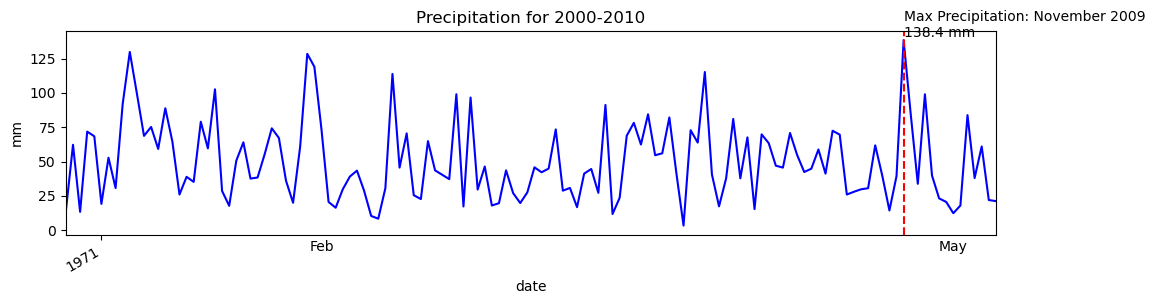

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 3))

# Plot the data
df_monthly['precipitation'].plot(ax=ax, color='blue')

# Add a vertical line for the date with max precipitation
plt.axvline(max_precipitation_date, color='red', linestyle='--')
plt.text(max_precipitation_date, max_precipitation_value, 
         f'Max Precipitation: {max_precipitation_date.strftime("%B %Y")}\n{max_precipitation_value} mm', 
         verticalalignment='bottom')

# Set the title and labels
plt.title('Precipitation for 2000-2010')
plt.ylabel('mm')

# Customize the major x-axis ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

# Customize the minor x-axis ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_tick_params(which='minor', size=0)

# Apply the auto date formatter
fig.autofmt_xdate()

# Show the plot
plt.show()

The plot above shows the total precipitation for each month between 2000 and 2010. The red dashed line indicates the month with the highest precipitation: November 2009, with 138.4 mm of rain.

# Q2: Which year between 2000-2020 had the coolest average temperature?

To answer this question, we need to:

1. Resample the data to a yearly frequency.
2. Find the year and corresponding value for the lowest mean temperature.
3. Plot the feature and time period that corresponds to the question.


Let's start by resampling the data to a yearly frequency and finding the year with the lowest average temperature.

In [8]:
# Filter data for 2000 through 2020
df_2000_2020 = df[(df.index.year >= 2000) & (df.index.year <= 2020)]

# Resample the data to yearly frequency
df_yearly = df_2000_2020.resample('Y').mean()

# Find the date and corresponding value for the lowest mean temperature
lowest_temp_date = df_yearly['mean_temp'].idxmin().year
lowest_temp_value = df_yearly['mean_temp'].min()

lowest_temp_date, lowest_temp_value

# The year with the lowest average temperature between 2000 and 2020 was 2010, which had an average temperature of approximately 10.66°C.

(2010, 10.66054794520548)

Now, let's create a plot of the average temperature for the period from 2000 through 2020. We'll add a vertical line at 2010 to denote the year with the lowest average temperature.

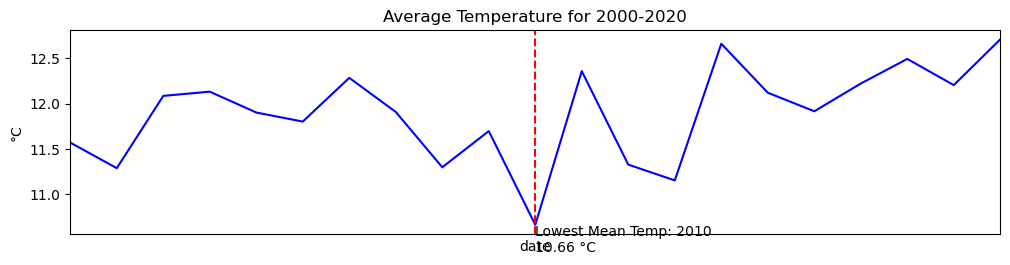

In [9]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 3))

# Plot the data
df_yearly['mean_temp'].plot(ax=ax, color='blue')

# Add a vertical line for the date with the lowest mean temperature
plt.axvline(pd.to_datetime(str(lowest_temp_date)), color='red', linestyle='--')
plt.text(pd.to_datetime(str(lowest_temp_date)), lowest_temp_value, 
         f'Lowest Mean Temp: {lowest_temp_date}\n{lowest_temp_value:.2f} °C', 
         verticalalignment='top')

# Set the title and labels
plt.title('Average Temperature for 2000-2020')
plt.ylabel('°C')

# Customize the major x-axis ticks
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

# Customize the minor x-axis ticks
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_tick_params(which='minor', size=0)

# Apply the auto date formatter
fig.autofmt_xdate()

# Show the plot
plt.show()

The plot above shows the average temperature for each year between 2000 and 2020. The red dashed line indicates the year with the lowest average temperature: 2010, with an average temperature of approximately 10.66°C.